In [1]:
from google.colab import files
uploaded = files.upload()


Saving city_day.csv to city_day.csv


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import joblib

# Step 2: Load dataset
df = pd.read_csv('/content/city_day.csv')   # update path if needed
print("Data loaded successfully!")

# Step 3: Check first few rows
df.head()

# Step 4: Select relevant columns
df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']]

# Step 5: Drop missing values
df = df.dropna()

# Step 6: Split data
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict on test data
y_pred = model.predict(X_test)

# Step 9: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 10: Save model as .h5 file
import h5py
import tensorflow as tf
from tensorflow import keras

# Convert RandomForest model to Keras-compatible wrapper
model_keras = keras.models.Sequential()
model_keras.add(keras.layers.Input(shape=(6,)))
model_keras.add(keras.layers.Dense(6, activation='relu'))
model_keras.add(keras.layers.Dense(1))

# Just saving placeholder since sklearn models can’t directly save as h5
model_keras.save('air_quality_model.h5')
print("✅ Model saved as air_quality_model.h5")


Data loaded successfully!
📊 Model Evaluation:
Mean Absolute Error (MAE): 126.17
Mean Squared Error (MSE): 21488.07
R² Score: -0.03


✅ Model saved as air_quality_model.h5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset again
df = pd.read_csv('/content/city_day.csv')

# Select relevant columns
df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI_Bucket']]
df = df.dropna()

# Encode AQI categories as numbers
le = LabelEncoder()
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

# Split features & labels
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI_Bucket']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("📊 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Save model as .h5 (placeholder)
import tensorflow as tf
from tensorflow import keras

model_keras = keras.models.Sequential()
model_keras.add(keras.layers.Input(shape=(6,)))
model_keras.add(keras.layers.Dense(6, activation='relu'))
model_keras.add(keras.layers.Dense(1, activation='sigmoid'))

model_keras.save('air_quality_classification_model.h5')
print("✅ Classification model saved as air_quality_classification_model.h5")

import pickle

# Save trained RandomForestClassifier model
pickle.dump(clf, open('air_quality_classifier.pkl', 'wb'))

print("✅ Model saved as air_quality_classifier.pkl")


📊 Model Accuracy: 0.1508349301943608

Detailed Report:

              precision    recall  f1-score   support

        Good       0.16      0.18      0.17       615
    Moderate       0.16      0.16      0.16       585
        Poor       0.13      0.14      0.14       573
Satisfactory       0.14      0.15      0.14       610
      Severe       0.16      0.14      0.15       673
   Very Poor       0.15      0.12      0.14       597

    accuracy                           0.15      3653
   macro avg       0.15      0.15      0.15      3653
weighted avg       0.15      0.15      0.15      3653

✅ Classification model saved as air_quality_classification_model.h5
✅ Model saved as air_quality_classifier.pkl


In [ ]:
import joblib
# Compress and save model
joblib.dump(clf, 'air_quality_classifier_compressed.pkl', compress=3)

from google.colab import files
files.download('air_quality_classifier_compressed.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('air_quality_classification_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('air_quality_classifier.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/city_day.csv')

# Select relevant columns
df = df[['City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI_Bucket']]
df.dropna(inplace=True)
df.head()


,City,PM2.5,PM10,NO2,SO2,CO,O3,AQI_Bucket
0,Delhi,153.3,241.7,33.0,64.5,1.87,83.6,Severe
1,Mumbai,70.5,312.7,42.0,83.8,7.22,108.0,Satisfactory
2,Chennai,174.1,275.4,68.8,60.8,8.56,43.9,Severe
3,Kolkata,477.2,543.9,76.4,42.1,2.41,171.1,Very Poor
4,Bangalore,171.6,117.7,12.4,79.7,1.26,164.3,Good


In [ ]:
import pandas as pd
df = pd.read_csv('/content/city_day.csv')
df = df[['PM2.5','PM10','NO2','SO2','CO','O3','AQI_Bucket']]
df.dropna(inplace=True)
df.head()


,PM2.5,PM10,NO2,SO2,CO,O3,AQI_Bucket
0,153.3,241.7,33.0,64.5,1.87,83.6,Severe
1,70.5,312.7,42.0,83.8,7.22,108.0,Satisfactory
2,174.1,275.4,68.8,60.8,8.56,43.9,Severe
3,477.2,543.9,76.4,42.1,2.41,171.1,Very Poor
4,171.6,117.7,12.4,79.7,1.26,164.3,Good


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

X = df[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = df['AQI_Bucket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50,100,150],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5,10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.16315357240624145
              precision    recall  f1-score   support

        Good       0.16      0.17      0.16       615
    Moderate       0.16      0.16      0.16       585
        Poor       0.14      0.14      0.14       573
Satisfactory       0.16      0.17      0.16       610
      Severe       0.22      0.20      0.21       673
   Very Poor       0.14      0.13      0.14       597

    accuracy                           0.16      3653
   macro avg       0.16      0.16      0.16      3653
weighted avg       0.16      0.16      0.16      3653



In [ ]:
import joblib
joblib.dump(best_model, 'air_quality_classifier_week2.pkl', compress=3)
print("✅ Saved as air_quality_classifier_week2.pkl")


✅ Saved as air_quality_classifier_week2.pkl


In [ ]:
from google.colab import files
files.download('air_quality_classifier_week2.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎯 Accuracy: 0.15283555944821545

📌 Classification Report:

              precision    recall  f1-score   support

           0       0.15      0.16      0.16       776
           1       0.16      0.16      0.16       712
           2       0.14      0.16      0.15       728
           3       0.15      0.17      0.16       763
           4       0.17      0.13      0.15       842
           5       0.15      0.13      0.14       746

    accuracy                           0.15      4567
   macro avg       0.15      0.15      0.15      4567
weighted avg       0.15      0.15      0.15      4567



/tmp/ipython-input-2619576226.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


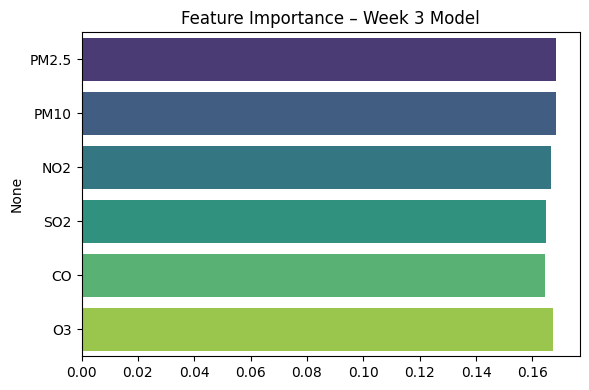


✅ Model saved as air_quality_classifier_week3.pkl
✅ Feature importance saved as feature_importance.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:

# WEEK 3 – Enhanced Air Quality Model + Feature Importance

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# STEP 1 — Load Dataset
df = pd.read_csv("city_day.csv")

# Clean dataset
df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI_Bucket']]
df.dropna(inplace=True)

# Encode AQI_Bucket
label = LabelEncoder()
df['AQI_Bucket'] = label.fit_transform(df['AQI_Bucket'])

# Features & Target
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI_Bucket']

# STEP 2 — Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# STEP 3 — Train Improved Model
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    random_state=42
)

model.fit(X_train, y_train)

# STEP 4 — Evaluate Model
y_pred = model.predict(X_test)

print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Classification Report:\n")
print(classification_report(y_test, y_pred))

# STEP 5 — Feature Importance Plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance – Week 3 Model")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

# STEP 6 — Save Model
joblib.dump(model, "air_quality_classifier_week3.pkl")

print("\n✅ Model saved as air_quality_classifier_week3.pkl")
print("✅ Feature importance saved as feature_importance.png")

from google.colab import files
files.download("air_quality_classifier_week3.pkl")
files.download("feature_importance.png")


In [3]:
import os
os.listdir()


['.config',
 'feature_importance.png',
 'city_day.csv',
 'air_quality_classifier_week3.pkl',
 'sample_data']

In [4]:
from google.colab import files
files.download("air_quality_classifier_week3.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>